**HAR LSTM**


In [44]:
!unzip "/content/UCI HAR Dataset.zip" -d "/content/"


Archive:  /content/UCI HAR Dataset.zip
replace /content/UCI HAR Dataset/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [46]:
import pandas as pd
import numpy as np

# Import Keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, BatchNormalization
from keras.regularizers import L1L2



In [73]:
# Activities are the class labels
# It is a 3 class classification
ACTIVITIES = {
    1: 'WALKING',
    2: 'WALKING_UPSTAIRS',
    3: 'WALKING_DOWNSTAIRS',
    4: 'SITTING',
    5: 'STANDING',
    6: 'LAYING'
}

In [74]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import pandas as pd
# import numpy as np

# def confusion_matrix(Y_true, Y_pred, ACTIVITIES):
#     # Convert one-hot encoded vectors to activity names
#     Y_true_labels = pd.Series([ACTIVITIES[y] for y in Y_true])
#     Y_pred_labels = pd.Series([ACTIVITIES[y] for y in Y_pred])

#     return pd.crosstab(Y_true_labels, Y_pred_labels, rownames=['True'], colnames=['Pred'])

# # Usage:
# # Y_true = ... (ground-truth one-hot labels, shape: [samples, num_classes])
# # Y_pred = ... (predicted one-hot/probas, shape: [samples, num_classes])
# # ACTIVITIES = {0: 'Walking', 1: 'Sitting', ...}

# result = confusion_matrix(Y_true, Y_pred, ACTIVITIES)
# plt.figure(figsize=(10, 8))
# sns.heatmap(result,
#             xticklabels=list(ACTIVITIES.values()),
#             yticklabels=list(ACTIVITIES.values()),
#             annot=True, fmt="d");
# plt.title("Confusion matrix")
# plt.ylabel('True label')
# plt.xlabel('Predicted label')
# plt.show()


In [75]:
# Data directory
DATADIR = "/content/UCI HAR Dataset"

# Raw data signals (accelerometer and gyroscope x, y, z directions)
SIGNALS = [
    "body_acc_x",
    "body_acc_y",
    "body_acc_z",
    "body_gyro_x",
    "body_gyro_y",
    "body_gyro_z",
    "total_acc_x",
    "total_acc_y",
    "total_acc_z"
]


In [76]:
import os
print(os.path.exists("/content/UCI HAR Dataset/train/y_train.txt"))  # Should print True


True


In [77]:
import os
print(os.listdir("/content/UCI HAR Dataset/train/Inertial Signals"))


['body_acc_y_train.txt', 'body_gyro_x_train.txt', 'body_acc_z_train.txt', 'total_acc_x_train.txt', 'total_acc_z_train.txt', 'body_gyro_z_train.txt', 'body_acc_x_train.txt', 'body_gyro_y_train.txt', 'total_acc_y_train.txt']


In [78]:
def load_y(subset):
    filename = f"/content/UCI HAR Dataset/{subset}/y_{subset}.txt"
    y = pd.read_csv(filename, sep=r'\s+', header=None)[0]
    return pd.get_dummies(y).to_numpy()

def load_signals(subset):
    signals_data = []
    for signal in SIGNALS:
        filename = f"/content/UCI HAR Dataset/{subset}/Inertial Signals/{signal}_{subset}.txt"
        signals_data.append(pd.read_csv(filename, sep=r'\s+', header=None).to_numpy())
    return np.transpose(signals_data, (1, 2, 0))


In [79]:
def load_data():
    X_train, X_test = load_signals('train'), load_signals('test')
    y_train, y_test = load_y('train'), load_y('test')
    return X_train, X_test, y_train, y_test

def _count_classes(y):
    return len(set([tuple(category) for category in y]))


In [80]:
# Load UCI HAR train and test sets
X_train, X_test, Y_train, Y_test = load_data()

print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)
print("Number of classes:", _count_classes(Y_train))


X_train shape: (7352, 128, 9)
Y_train shape: (7352, 6)
X_test shape: (2947, 128, 9)
Y_test shape: (2947, 6)
Number of classes: 6


In [81]:
# Importing tensorflow
np.random.seed(42)
import tensorflow as tf
tf.random.set_seed(42)

In [82]:
# Initializing parameters
epochs = 30
batch_size = 16
n_hidden = 32

In [83]:
#function to count the number of classes
def _count_classes(y):
    return len(set([tuple(category) for category in y]))

In [84]:
# Loading the train and test data
X_train, X_test, Y_train, Y_test = load_data()

In [85]:
timesteps = len(X_train[0])
input_dim = len(X_train[0][0])
n_classes = _count_classes(Y_train)

print(timesteps)
print(input_dim)
print(len(X_train))

128
9
7352


<html><h1><p style="color:red">1. Defining the Architecture of 1-Layer of LSTM </p></h1></html>

In [86]:
# Initiliazing the sequential model
model = Sequential()
# Configuring the parameters
model.add(LSTM(n_hidden, input_shape=(timesteps, input_dim)))
# Adding a dropout layer
model.add(Dropout(0.5))
# Adding a dense output layer with sigmoid activation
model.add(Dense(n_classes, activation='sigmoid'))
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 32)             │         5,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,574 (21.77 KB)

 Trainable params: 5,574 (21.77 KB)

 Non-trainable params: 0 (0.00 B)

In [87]:
# Compiling the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [88]:
# Training the model
model.fit(X_train, Y_train, batch_size=batch_size, validation_data=(X_test, Y_test),epochs=epochs)

Epoch 1/30
460/460 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.4047 - loss: 1.3938 - val_accuracy: 0.5416 - val_loss: 1.0630
Epoch 2/30
460/460 ━━━━━━━━━━━━━━━━━━━━ 20s 35ms/step - accuracy: 0.6148 - loss: 0.9141 - val_accuracy: 0.7011 - val_loss: 0.7534
Epoch 3/30
460/460 ━━━━━━━━━━━━━━━━━━━━ 22s 39ms/step - accuracy: 0.7293 - loss: 0.6733 - val_accuracy: 0.7513 - val_loss: 0.6856
Epoch 4/30
460/460 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - accuracy: 0.7735 - loss: 0.5757 - val_accuracy: 0.7788 - val_loss: 0.6438
Epoch 5/30
460/460 ━━━━━━━━━━━━━━━━━━━━ 17s 37ms/step - accuracy: 0.8380 - loss: 0.4678 - val_accuracy: 0.8232 - val_loss: 0.5731
Epoch 6/30
460/460 ━━━━━━━━━━━━━━━━━━━━ 19s 35ms/step - accuracy: 0.8844 - loss: 0.3641 - val_accuracy: 0.8249 - val_loss: 0.6015
Epoch 7/30
460/460 ━━━━━━━━━━━━━━━━━━━━ 20s 35ms/step - accuracy: 0.9033 - loss: 0.3176 - val_accuracy: 0.8327 - val_loss: 0.5877
Epoch 8/30
460/460 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.9085 - loss: 0.2899 - 

In [90]:
from sklearn.metrics import classification_report, f1_score

# Predict labels for test set
Y_pred = model.predict(X_test)
Y_true = Y_test

# Convert one-hot to integer classes
y_true_int = Y_true.argmax(axis=1)
y_pred_int = Y_pred.argmax(axis=1)

# Print per-class F1
print(classification_report(y_true_int, y_pred_int))
# Or get per-class F1 scores in an array:
f1s = f1_score(y_true_int, y_pred_int, average=None)
print("Per-class F1:", f1s)


93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step
              precision    recall  f1-score   support

           0       0.82      0.96      0.88       496
           1       0.98      0.84      0.90       471
           2       0.92      0.90      0.91       420
           3       0.82      0.77      0.80       491
           4       0.77      0.84      0.80       532
           5       1.00      0.95      0.97       537

    accuracy                           0.88      2947
   macro avg       0.88      0.88      0.88      2947
weighted avg       0.88      0.88      0.88      2947

Per-class F1: [0.88268156 0.90307868 0.90756303 0.79535865 0.80071813 0.97328244]


In [91]:
import time
start = time.time()
_ = model.predict(X_test[:100])  # or a single example
end = time.time()
print("Latency per sample (s):", (end - start)/100)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Latency per sample (s): 0.001207587718963623


93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step


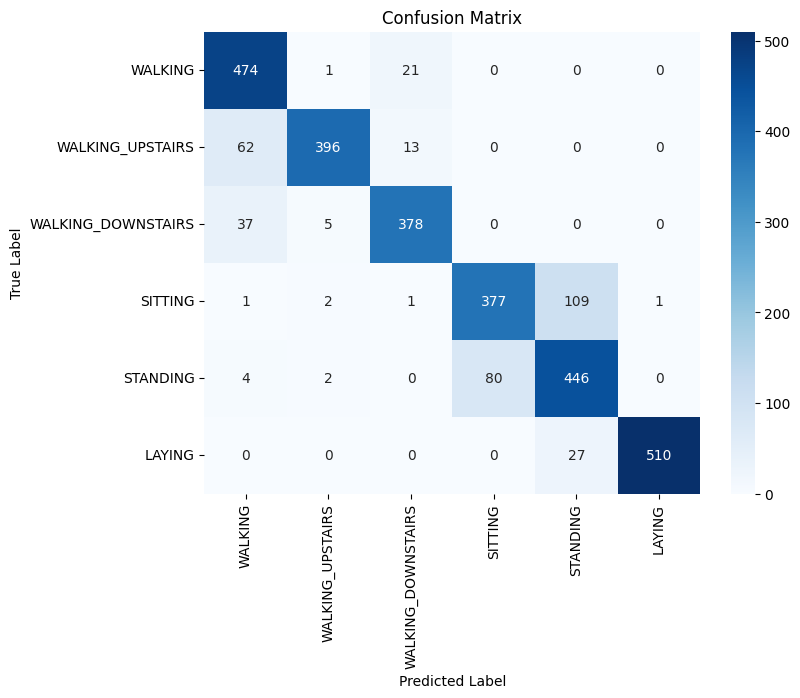

In [93]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(Y_true, Y_pred, labels=None):
    # Convert one-hot to integer classes if needed
    if Y_true.ndim > 1:
        Y_true = np.argmax(Y_true, axis=1)
    if Y_pred.ndim > 1:
        Y_pred = np.argmax(Y_pred, axis=1)

    cm = confusion_matrix(Y_true, Y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=labels,
                yticklabels=labels)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

# Example usage (after fitting/using your model):
# labels = ['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING', 'STANDING', 'LAYING']
plot_confusion_matrix(Y_test, model.predict(X_test), labels=['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING', 'STANDING', 'LAYING'])


In [94]:
score = model.evaluate(X_test, Y_test)

print("\n   cat_crossentropy  ||   accuracy ")
print("  ____________________________________")
print(score)

93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.8482 - loss: 0.6578

   cat_crossentropy  ||   accuracy 
  ____________________________________
[0.6856056451797485, 0.8758059144020081]


<html><h3><p style="color:#008080">With a simple 1 layer architecture we got 87.58% accuracy and a loss of 0.68</p></h4></html>

**<html><h1><p style="color:red">2. Defining the Architecture of 2-Layer of LSTM with more hyperparameter tunning </p></h1></html>**

### 2.1 First Model for 2-Layer of LSTM with more hyperparameter tunning

In [95]:
# Initializing parameters
n_epochs = 30
n_batch = 16
n_classes = _count_classes(Y_train)

# Bias regularizer value - we will use elasticnet
reg = L1L2(0.01, 0.01)

In [96]:
# Model execution
model = Sequential()
model.add(LSTM(48, input_shape=(timesteps, input_dim), return_sequences=True,bias_regularizer=reg ))
model.add(BatchNormalization())
model.add(Dropout(0.50))
model.add(LSTM(32))
model.add(Dropout(0.50))
model.add(Dense(n_classes, activation='sigmoid'))
print("Model Summary: ")
model.summary()

Model Summary: 


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 128, 48)        │        11,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 48)        │           192 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128, 48)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 32)             │        10,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,894 (85.52 KB)

 Trainable params: 21,798 (85.15 KB)

 Non-trainable params: 96 (384.00 B)

In [97]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [98]:
# Training the model
model.fit(X_train, Y_train, batch_size=n_batch, validation_data=(X_test, Y_test), epochs=n_epochs)

Epoch 1/30
460/460 ━━━━━━━━━━━━━━━━━━━━ 45s 88ms/step - accuracy: 0.5676 - loss: 1.9203 - val_accuracy: 0.8032 - val_loss: 1.0452
Epoch 2/30
460/460 ━━━━━━━━━━━━━━━━━━━━ 44s 96ms/step - accuracy: 0.8308 - loss: 0.8959 - val_accuracy: 0.8809 - val_loss: 0.5382
Epoch 3/30
460/460 ━━━━━━━━━━━━━━━━━━━━ 48s 105ms/step - accuracy: 0.8970 - loss: 0.4960 - val_accuracy: 0.9002 - val_loss: 0.3513
Epoch 4/30
460/460 ━━━━━━━━━━━━━━━━━━━━ 41s 90ms/step - accuracy: 0.9152 - loss: 0.3202 - val_accuracy: 0.8985 - val_loss: 0.3041
Epoch 5/30
460/460 ━━━━━━━━━━━━━━━━━━━━ 41s 89ms/step - accuracy: 0.9166 - loss: 0.2709 - val_accuracy: 0.9006 - val_loss: 0.2871
Epoch 6/30
460/460 ━━━━━━━━━━━━━━━━━━━━ 83s 92ms/step - accuracy: 0.9380 - loss: 0.1843 - val_accuracy: 0.8938 - val_loss: 0.3350
Epoch 7/30
460/460 ━━━━━━━━━━━━━━━━━━━━ 43s 93ms/step - accuracy: 0.9333 - loss: 0.2031 - val_accuracy: 0.9141 - val_loss: 0.2295
Epoch 8/30
460/460 ━━━━━━━━━━━━━━━━━━━━ 42s 92ms/step - accuracy: 0.9345 - loss: 0.1849 -

93/93 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step


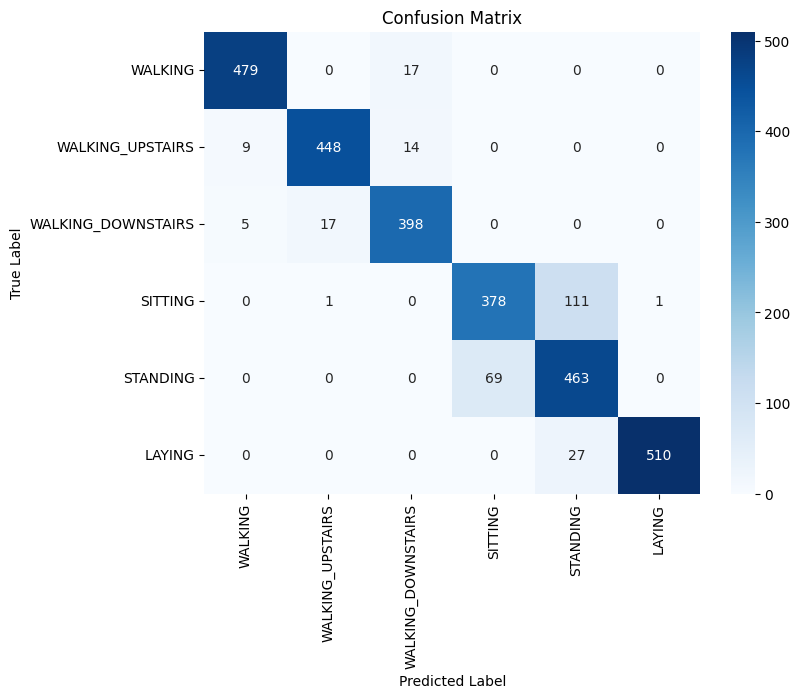

In [99]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(Y_true, Y_pred, labels=None):
    # Convert one-hot to integer classes if needed
    if Y_true.ndim > 1:
        Y_true = np.argmax(Y_true, axis=1)
    if Y_pred.ndim > 1:
        Y_pred = np.argmax(Y_pred, axis=1)

    cm = confusion_matrix(Y_true, Y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=labels,
                yticklabels=labels)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

# Example usage (after fitting/using your model):
# labels = ['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING', 'STANDING', 'LAYING']
plot_confusion_matrix(Y_test, model.predict(X_test), labels=['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING', 'STANDING', 'LAYING'])


In [100]:
score = model.evaluate(X_test, Y_test)

print("\n   cat_crossentropy  ||   accuracy ")
print("  ____________________________________")
print(score)

93/93 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.8795 - loss: 0.4494

   cat_crossentropy  ||   accuracy 
  ____________________________________
[0.3995450437068939, 0.9080420732498169]


<html><h3><p style="color:#008080">With 2 layer architecture model 1 we got 90.80% accuracy and a loss of 0.39</p></h4></html>

In [101]:
from sklearn.metrics import classification_report, f1_score

# Predict labels for test set
Y_pred = model.predict(X_test)
Y_true = Y_test

# Convert one-hot to integer classes
y_true_int = Y_true.argmax(axis=1)
y_pred_int = Y_pred.argmax(axis=1)

# Print per-class F1
print(classification_report(y_true_int, y_pred_int))
# Or get per-class F1 scores in an array:
f1s = f1_score(y_true_int, y_pred_int, average=None)
print("Per-class F1:", f1s)


93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       496
           1       0.96      0.95      0.96       471
           2       0.93      0.95      0.94       420
           3       0.85      0.77      0.81       491
           4       0.77      0.87      0.82       532
           5       1.00      0.95      0.97       537

    accuracy                           0.91      2947
   macro avg       0.91      0.91      0.91      2947
weighted avg       0.91      0.91      0.91      2947

Per-class F1: [0.96865521 0.95624333 0.93757362 0.80597015 0.81729921 0.97328244]


In [102]:
import time
start = time.time()
_ = model.predict(X_test[:100])  # or a single example
end = time.time()
print("Latency per sample (s):", (end - start)/100)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Latency per sample (s): 0.002579667568206787


### 2.2 Second Model for 2-Layer of LSTM with more hyperparameter tunning

In [103]:
# Model execution
model = Sequential()
model.add(LSTM(64, input_shape=(timesteps, input_dim), return_sequences=True, bias_regularizer=reg))
model.add(BatchNormalization())
model.add(Dropout(0.50))
model.add(LSTM(48))
model.add(Dropout(0.50))
model.add(Dense(n_classes, activation='sigmoid'))
print("Model Summary: ")
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model Summary: 


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 128, 64)        │        18,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128, 64)        │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 48)             │        21,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 48)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │           294 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41,190 (160.90 KB)

 Trainable params: 41,062 (160.40 KB)

 Non-trainable params: 128 (512.00 B)

In [104]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [105]:
# Training the model
model.fit(X_train, Y_train, batch_size=n_batch, validation_data=(X_test, Y_test), epochs=n_epochs)

Epoch 1/30
460/460 ━━━━━━━━━━━━━━━━━━━━ 55s 108ms/step - accuracy: 0.6188 - loss: 2.0777 - val_accuracy: 0.8531 - val_loss: 1.0799
Epoch 2/30
460/460 ━━━━━━━━━━━━━━━━━━━━ 48s 105ms/step - accuracy: 0.8918 - loss: 0.8384 - val_accuracy: 0.7326 - val_loss: 1.1594
Epoch 3/30
460/460 ━━━━━━━━━━━━━━━━━━━━ 81s 102ms/step - accuracy: 0.9118 - loss: 0.4495 - val_accuracy: 0.8168 - val_loss: 0.4507
Epoch 4/30
460/460 ━━━━━━━━━━━━━━━━━━━━ 84s 106ms/step - accuracy: 0.9189 - loss: 0.2686 - val_accuracy: 0.9080 - val_loss: 0.3224
Epoch 5/30
460/460 ━━━━━━━━━━━━━━━━━━━━ 48s 104ms/step - accuracy: 0.9401 - loss: 0.1711 - val_accuracy: 0.9080 - val_loss: 0.2659
Epoch 6/30
460/460 ━━━━━━━━━━━━━━━━━━━━ 47s 103ms/step - accuracy: 0.9310 - loss: 0.1885 - val_accuracy: 0.9087 - val_loss: 0.2863
Epoch 7/30
460/460 ━━━━━━━━━━━━━━━━━━━━ 81s 102ms/step - accuracy: 0.9377 - loss: 0.1904 - val_accuracy: 0.8833 - val_loss: 0.3350
Epoch 8/30
460/460 ━━━━━━━━━━━━━━━━━━━━ 82s 103ms/step - accuracy: 0.9397 - loss: 0

93/93 ━━━━━━━━━━━━━━━━━━━━ 7s 68ms/step


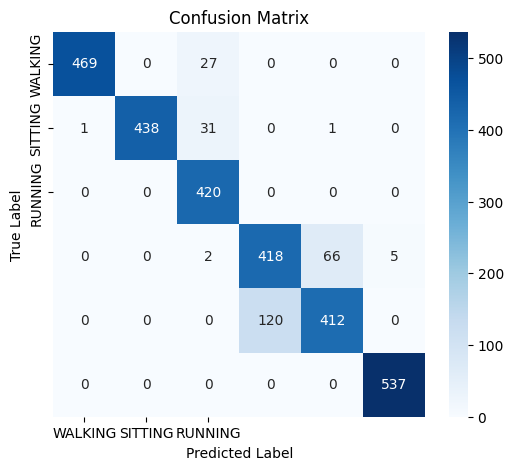

In [106]:
def plot_confusion_matrix(Y_true, Y_pred, labels):
    if Y_true.ndim > 1:
        Y_true = np.argmax(Y_true, axis=1)
    if Y_pred.ndim > 1:
        Y_pred = np.argmax(Y_pred, axis=1)
    from sklearn.metrics import confusion_matrix
    import matplotlib.pyplot as plt
    import seaborn as sns

    cm = confusion_matrix(Y_true, Y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

labels = ['WALKING', 'SITTING', 'RUNNING']
plot_confusion_matrix(Y_test, model.predict(X_test), labels)


In [107]:
import time
start = time.time()
_ = model.predict(X_test[:100])  # or a single example
end = time.time()
print("Latency per sample (s):", (end - start)/100)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Latency per sample (s): 0.004225130081176758


In [108]:
from sklearn.metrics import classification_report, f1_score

# Predict labels for test set
Y_pred = model.predict(X_test)
Y_true = Y_test

# Convert one-hot to integer classes
y_true_int = Y_true.argmax(axis=1)
y_pred_int = Y_pred.argmax(axis=1)

# Print per-class F1
print(classification_report(y_true_int, y_pred_int))
# Or get per-class F1 scores in an array:
f1s = f1_score(y_true_int, y_pred_int, average=None)
print("Per-class F1:", f1s)


93/93 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       496
           1       1.00      0.93      0.96       471
           2       0.88      1.00      0.93       420
           3       0.78      0.85      0.81       491
           4       0.86      0.77      0.82       532
           5       0.99      1.00      1.00       537

    accuracy                           0.91      2947
   macro avg       0.92      0.92      0.92      2947
weighted avg       0.92      0.91      0.91      2947

Per-class F1: [0.97101449 0.96369637 0.93333333 0.81243926 0.81503462 0.99536608]


In [109]:
score = model.evaluate(X_test, Y_test)

print("\n   cat_crossentropy  ||   accuracy ")
print("  ____________________________________")
print(score)

93/93 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - accuracy: 0.8611 - loss: 0.3856

   cat_crossentropy  ||   accuracy 
  ____________________________________
[0.33662065863609314, 0.9141499996185303]


<html><h3><p style="color:#008080">With 2 layer architecture model 1 we got 91.41% accuracy and a loss of 0.33</p></h4></html>